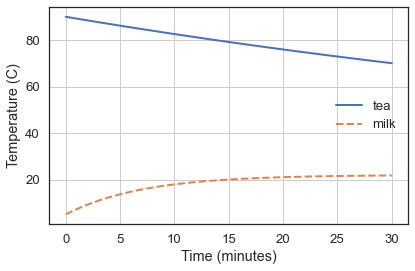

In [14]:
from TeaMilk import *
import matplotlib.pyplot as plt
import modsim as ms

#得到milk的rm
def error20(r):
    tmp=Liquid(5,r,50,22,0,15,0.1)
    return tmp.T_end-20
    pass
rm=ms.root_bisect(error20,[0.01,0.2]).root
milk=Liquid(5,rm,50,22,0,30,0.1,'milk')

#得到tea的rt
def error70(r):
    tmp=Liquid(90,r,300,22,0,30,0.5)
    return tmp.T_end-70
    pass
rt=ms.root_bisect(error70,[0.01,0.2]).root
tea=Liquid(90,rt,300,22,0,30,0.1,'tea')

#绘制自然状态下的冷却曲线
ms.plot(tea.frame.T,label=tea.name)
ms.plot(milk.frame.T,'--',label=milk.name)
ms.decorate(xlabel='Time (minutes)',ylabel='Temperature (C)',loc='center right')
plt.grid(True)

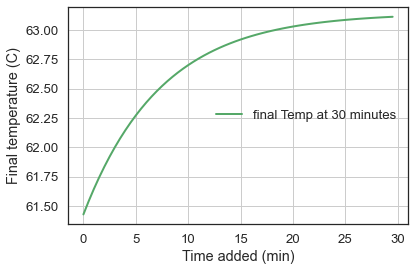

In [15]:
def mix_run(t,t_total):
    '''定义一个混合函数，在t时刻混合l1和l2
    给出新液体在t_total-t之后的温度
    默认r取rt
    返回值为温度
    '''
    tmp_tea=Liquid(90,rt,300,22,0,t,0.5)
    tmp_milk=Liquid(5,rm,50,22,0,t,0.5)
    tmp_mt=tmp_tea.mix(tmp_milk,left_time=t_total-t)
    return tmp_mt.T_end
    pass
#开始混合扫描
ts=ms.linrange(0,30,0.5)
sweep=ms.SweepSeries()
for ti in ts:
    sweep[ti]=mix_run(ti,30)
    pass

#绘制
ms.plot(sweep,label='final Temp at 30 minutes',color='g')
ms.decorate(xlabel='Time added (min)',ylabel='Final temperature (C)',loc='center right')
plt.grid(True)
plt.show()